<div class="alert alert-info">

# PSY 4016 / 6973
# Cueillette et traitement des données en neurosciences cognitives
## Chapitre 9: Apprentissage automatique supervisé
<p>
<li>LDA : prétraitement pour extraction des composantes les plus importantes. Quand les composantes sont extraites, on peut segmenter un nouveau cadre de donneés pour faire la prédiction
<li>SVM : algo lin. pour faire les prédictions
<li>KNN
<li>Arbre de décision : et forêts aléatoires sont des méthodes de prédiction non paramétriques
<li>Forêts aléatoires
</div>

## (supervisé) groupe train/test --> utilisé pour prédire des caracts, mais prend tout en compte les caract. de notre jeu de données

## ADL/ACP : permet d'éviter des efforts de calculs, en extrayant les caracts les plus importantes de notre jeu de données 
LDA : prétraitement pour extraction des composantes les plus importantes

    --> réduire la dimensionnalité et ensuite implémenter la prédiction

In [5]:
# ====> À apprendre <====

import pandas as pd
import numpy as np
import scipy
from scipy import stats


%matplotlib inline
#pour jupyter afin de regarder les images en ligne
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,5) # code pour ajuster les dimensions des images

import seaborn as sns;
sns.set()
import sklearn

In [6]:
print('VERSIONS: \n numpy:{}\n pandas: {}\n scipy: {}\
      \n matplotlib: {}\n seaborn: {}\n sklearn: {}\n'.format(
        np.__version__, pd.__version__, scipy.__version__,
        matplotlib.__version__, sns.__version__, sklearn.__version__))

VERSIONS: 
 numpy:1.22.0
 pandas: 1.3.5
 scipy: 1.7.3      
 matplotlib: 3.5.1
 seaborn: 0.11.2
 sklearn: 1.0.2



In [102]:
from sklearn.datasets import fetch_lfw_people, make_blobs, make_circles, load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC         #Support vector classifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# code pour aider à la présentation

from IPython.display import Image
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from helpers import plotting_help 

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


<div class="alert alert-info">
<b><h1>ADL / LDA (apprentissage supervisé)</h1></b></div>

<div class="alert alert-success">
L'analyse discriminante linéaire (ADL) est le plus souvent utilisée comme
<li>technique de réduction de la dimensionnalité lors de l'étape de prétraitement 
<li>L'objectif est de projeter un jeu de données / espace de caractéristiques (n-dimensionnel) sur un sous-espace de dimension inférieure (k ≤ n − 1) tout en maintenant les informations discriminantes sur la classe.
<li>avec une bonne séparabilité de classe 
<li>afin d'éviter les surajustements
<li>et de réduire les coûts de calcul.
</div>

<div class="alert alert-success">
<h3><b>ADL contre ACP (PCA)</b></h3>
<br>
<li>L’approche générale de l’ADL est très similaire à une ACP/PCA (analyse en composantes principales)- sont toutes deux des techniques de transformation linéaire utilisées pour la réduction de la dimensionnalité.
<li>ACP/PCA:<ul>
<li>algorithme «non supervisé» («ignore» les étiquettes de classe)
<li> avec l'objectif de trouver les directions (les composantes dites principales) qui maximisent la variance dans un jeu de données</ul>
<li>ADL/LDA:<ul>
<li>est «supervisée»
<li>cherche les axes composants
<li>+ calcule les directions («discriminants linéaires») qui représenteront les axes maximisant la séparation entre plusieurs classes</ul>

<br>
<li>il semble intuitif que:<ul>
<li>pour une tâche de classificatoin à plusieurs classes
<li>pour laquelle les étiquettes de classes sont connues
<li>ADL semble être supérieur à ACP
<li>cela peut ne pas toujours être le cas.
<br><br>
<li>si le nombre d'échantillons par classe est relativement petit
<li>ACP a tendance à surperformer ADL (PCA contre LDA, A.M. Martinez et al., 2001)
<li>en pratique, l’ADL et l’ACP sont souvnet associées</div>

In [ ]:
#PCA -trouve les caracts qui peuvent expliquer les groupes qu'on lui donne comme référence

#ADL - trouve lui même les classes

In [11]:
Image("lda_pca.png")

FileNotFoundError: No such file or directory: 'lda_pca.png'

FileNotFoundError: No such file or directory: 'lda_pca.png'

<IPython.core.display.Image object>

<div class="alert alert-success">
Pour comprendre le fonctionnement de LDA, utilisons le jeu de données iris</div>

In [12]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
x = np.array(iris.iloc[:, 0:4])
y = iris['species'].values

<div class="alert alert-success">
le <i>LabelEncoder</i> peut être utilisé pour convertir les étiquettes en nombres</div>

In [14]:
# ====> À apprendre <====

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

#fit_transform(y)

##  Visualisation des données pour voir quelles classes (var) permettent de classer les groupes

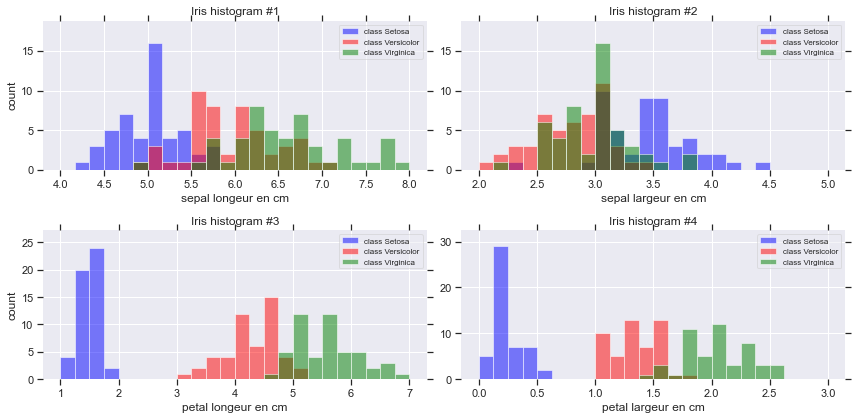

In [15]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal longeur en cm',
                  'sepal largeur en cm',
                  'petal longeur en cm',
                  'petal largeur en cm', ))}
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

import math
for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(x[:,cnt]))
    max_b = math.ceil(np.max(x[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(x[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

<div class="alert alert-success">
<li>Les représentations graphiques montre que les longueurs et les largeurs de pétales sont probablement mieux adaptées en tant que caractéristiques potentielles pour séparées entre les trois classes de fleurs
<li>En pratique, au lieu de réduire la dimensionnalité via une projection (ici: LDA), une bonne alternative serait une technique de sélection des caractéristiques. Pour les ensembles de données de faible dimension comme Iris, un coup d’œil sur ces histogrammes serait déjà très instructif.</div>

<div class="alert alert-success">
ADL est basé sur les hypothèses suivantes:<ul>
<li>les données sont normalement distribuées
<li>les caractéristiques sont statistiquement indépendantes
<li>les caractéristiques ont des matrices de covariance identiques pour chaque classe.</ul>
L'ADL pour la réduction de la dimensionnalité peut fonctionner raisonnablement bien si ces hypothèses ne sont pas remplie</div>

<div class="alert alert-success">
En pratique, l'ADL pour la réduction de la dimensionnalité est simplement une autre étape du prétraitement comportant 5 étapes:</div>

<div class="alert alert-success">
<h3><b>Etape 1: Calcul des vecteurs moyens de dimension d</b></h3>
<br>Calculer les vecteurs moyens d-dimensionnels pour les différentes classes de l'ensemble de données.</div>

In [16]:
#np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class {0}: {1}\n'.format(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



<div class="alert alert-success">
<h3><b>Étape 2: Calcul des matrices de dispersion</b></h3>
<br>
calculer les deux matrices de dimension 4x4: La matrice de dispersion intra-classe et inter-classe.</div>

In [17]:
# Matrice de dispersion INTRA-classe (à l'intérieur de la classe)

S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)


# Matrice de dispersion entre les classes

overall_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

within-class Scatter Matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
between-class Scatter Matrix:
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


<div class="alert alert-success">
<h3><b>Étape 3: Résoudre le problème généralisé des valeurs propres</b></h3>
<br>
Calculer les vecteurs propres (ee1, ee2, ..., eed) et les valeurs propres correspondantes (λλ1, λλ2, ..., λλd) pour les matrices de dispersion.
</div>

In [18]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.20874182]
 [ 0.38620369]
 [-0.55401172]
 [-0.7073504 ]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.66416814]
 [-0.19104638]
 [-0.16827662]
 [-0.25235824]]
Eigenvalue 3: 4.36e-15

Eigenvector 4: 
[[ 0.66416814]
 [-0.19104638]
 [-0.16827662]
 [-0.25235824]]
Eigenvalue 4: 4.36e-15


In [19]:
# Vérification du calcul du vecteur propre

for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


<div class="alert alert-success">
<h3><b>Étape 4: Sélection des discriminants linéaires pour le nouvel sous-espace de fonctionnalités</b></h3>
<br>Étapes:
<li>Trier les vecteurs propres
<li>en diminuant les valeurs propres 
<li>et choisir k vecteurs propres avec les plus grandes valeurs propres 
<li>pour former une matrice WW 
<li>avec les dimensions d × k (où chaque colonne représente un vecteur propre).
</div>

<div class="alert alert-success">
<h5><b>4.1. Tri des vecteurs propres en diminuant les valeurs propres
</b></h5>
<br>
Rappelez-vous que l'objectif est:<ol>
<li>de projeter les données dans un sous-espace pour améliorer la séparabilité des classes
<li>et de réduire la dimensionnalité de notre espace de fonctions (où les vecteurs propres formeront les axes de ce nouveau sous-espace de fonctions).</ol>
<br>
<li>mais les vecteurs propres ne définissent que les directions du nouvel axe (car ils ont tous la même longueur unitaire 1)
<li>cela implique l'obligation de décider quel(s) vecteur(s) propre(s) doit être supprimer pour le sous-espace de dimension inférieure.
<li>pour cela, il faut examener les valeurs propres correspondantes aux vecteurs propres (les vecteurs propres ayant les valeurs propres les plus basses portent le moins d’informations sur la distribution des données)
<li>L’approche commune consiste à classer les vecteurs propres de la valeur propre la plus élevée à la plus faible et à choisir les k premiers vecteurs propres.
</div>

In [20]:
# Faire une liste de tuples (valeur propre, vecteur propre)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Trier les tuples (valeur propre, vecteur propre) de haut en bas
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Confirmer visuellement que la liste est correctement triée par diminution des valeurs propres

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.19192919827802
0.2853910426230712
4.663428152873074e-15
4.663428152873074e-15


<div class="alert alert-success">
Maintenant, exprimons la «variance expliquée» en pourcentage:
</div>

In [21]:
print('Variance expliquée, en pourcentage:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance expliquée, en pourcentage:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


<div class="alert alert-success">
Le premier couple propre est de loin le plus informatif, et nous ne perdrons pas beaucoup d’informations si nous formions un espacement 1D basé sur ce couple propre.<br>

<h5><b>4.2. Choisir k vecteurs propres avec les plus grandes valeurs propres</b></h5>
<br>
Après avoir trié les paires propres en diminuant les valeurs propres, il est maintenant temps de construire la matrice WW de vecteurs propres de k × d-dimensions (dans la base de données actuelle 4 × 2: basée sur les 2 paires propres les plus informatives) et réduisant ainsi l’espace de caractéristiques initial à 4 dimensions en un sous-espace de caractéristiques à 2 dimensions.
</div>

In [22]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


<div class="alert alert-success">
<h3><b>Étape 5: Transformer les échantillons dans le nouveau sous-espace</b></h3>
<br>
<li>Utilisez ce d × k matrice de vecteurs propres pour transformer les échantillons dans le nouveau sous-espace.
<li>Ceci peut être résumé par la multiplication de matrice:
<li>YY = XX × WW 
<li>(où XX est une matrice de n × d dimensions représentant les n échantillons et YY les échantillons transformés n × k dimensions dans le nouvel sous-espace).
</div>

In [23]:
X_lda = x.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensions"

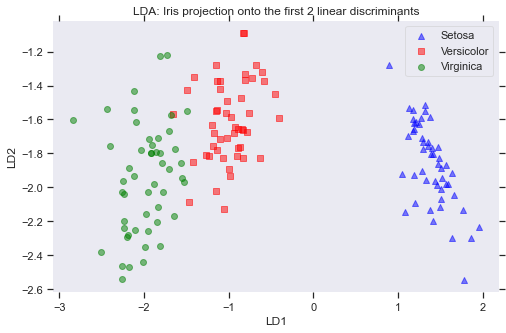

In [24]:
def plot_lda_by_step():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_lda_by_step()

dans le graph, on voit que la première LD explique très bien les données, mais pas la LD2

<div class="alert alert-success">
<li>Le diagramme de dispersion ci-dessus représente le nouvel sous-espace de fonctions construit via LDA.
<li>Le premier discriminant linéaire “LD1” sépare assez bien les classes.
<li>Le second discriminant, «LD2», n’ajoute pas beaucoup d’informations précieuses.</div>

<div class="alert alert-success">
ADL peut être utilisé plus facilement via la classe LDA implémentée dans la bibliothèque d’apprentissage machine scikit-learn.</div>

In [25]:
# ====> À apprendre <====
# Ces deux lignes de code font les 5 étapes vues précédemment

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x, y)

In [26]:
def plot_lda_from_scikit(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

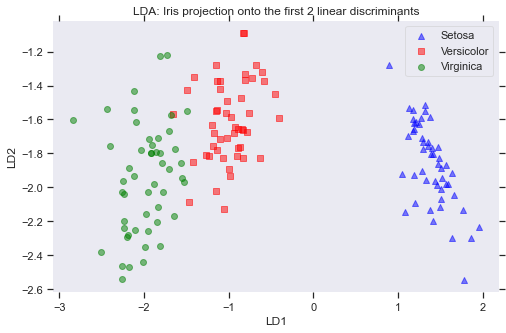

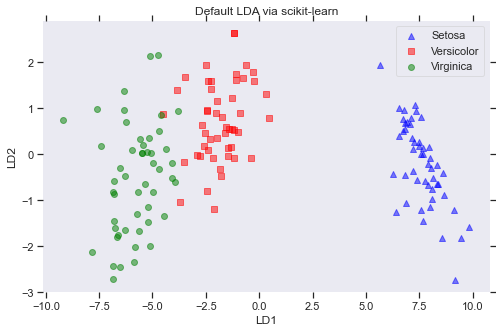

In [27]:
plot_lda_by_step()
plot_lda_from_scikit(X_lda_sklearn, title='Default LDA via scikit-learn')

<div class="alert alert-info">
<b><h1>MVS / SVM</h1></b></div>

<div class="alert alert-success">
Les machines à vecteurs de support (SVM) constituent une classe particulièrement puissante et flexible d’algorithmes supervisés pour
<li>la classification discriminante et 
<li>la régression.</div>

<div class="alert alert-success">
<b><h3>classification discriminante:</h3></b>
<br>
<li>La classification discriminante trouve une ligne ou une courbe (dans deux dimensions) ou une variété (dans plusieurs dimensions) qui divise les classes les unes des autres.
<br>
<li>Analysons un exemple simple lorsque deux classes sont bien séparées.
</div>

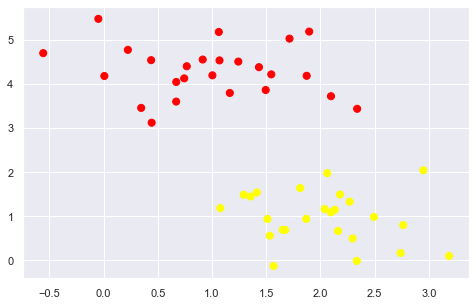

In [28]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

<div class="alert alert-success">
Un classifieur discriminatif linéaire tenterait de tracer une ligne droite séparant les deux ensembles de données et créerait ainsi un modèle de classification.</div>

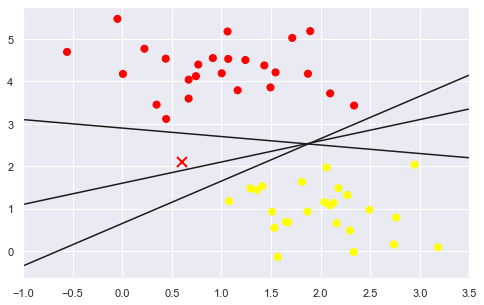

In [29]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')

plt.xlim(-1, 3.5);

<div class="alert alert-success">
<li>nous voyons immédiatement qu'il y a plus d'une ligne de division possible qui peut parfaitement distinguer les deux classes.
<li>Nous pouvons voir ici trois séparateurs différents qui distinguent parfaitement les échantillons.
<li>Toutefois, il est rarement nécessaire de tracer des lignes manuelles pour l'analyse des données.</div>

<div class="alert alert-success">
Pour mieux comprendre le fonctionnement des machines à vecteurs de support, nous tracerons autour de chaque ligne une marge jusqu’au point le plus proche.</div>

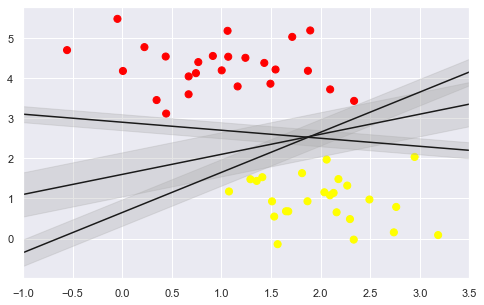

In [30]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.3)

plt.xlim(-1, 3.5);

<div class="alert alert-success">
Dans les machines à vecteurs de support, la ligne qui maximise cette marge est celle que nous choisirons comme modèle optimal.
</div>

<div class="alert alert-success">
<li>Jouons avec le modèle SVM du classifieur vectoriel de support Scikit-Learn pour former un modèle SVM.
<li>Nous allons utiliser un noyau linéaire et un gros paramètre C</div>

In [34]:
# ====> À apprendre <==== *les deux ligne pour faire l'algo, la cellule ensuite est pour voir graphqiuement
#hyperparamètre qui doivent être def : kernel='linear' (assume que les données sont distribuées linéairement) et 

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

<div class="alert alert-success">
Pour visualiser le modèle, nous allons utiliser une fonction décrite par d’autres et tracer les limites de décision du SVM.</div>

In [32]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #obtenir les axes actuels
    xlim = ax.get_xlim() #renvoie les limites de la vue de l'axe des x
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)              #créer une grille rectangulaire
    xy = np.vstack([X.ravel(), Y.ravel()]).T   #empiler des tableaux en séquence verticalement
    #ravel = Retourne un tableau / une liste aplatie; 
    #C'est équivalent à reshape(-1, order = order)
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

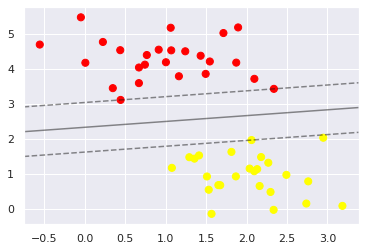

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

<div class="alert alert-success">
<li>Dans l'exemple, la ligne de séparation est celle qui maximise la marge entre les deux ensembles de points.
<li>Quelques points d'entraînement touchent la marge (indiquée par les cercles noirs)
<li>Ces points sont les éléments centraux de cet ajustement. Ils sont appelés vecteurs de support et donnent son nom à l'algorithme
<li>Dans Scikit-Learn, l'identité de ces points est stockée dans l'attribut<i> support\_vectors\_</i></div>

In [35]:
# ====> À apprendre <====
# ce sont les trois points qui sont les supports de vwcteurs dans le graph d'en haut (les trois points sur les - - - - -)
#Ainsi, ces trois valeurs sont nécessaires pour faire la distinction entre
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

<div class="alert alert-success">
Une des clés du succès de ce classificateur est que, pour l’ajustement, seule la position des vecteurs de support importe; les points situés plus loin de la marge qui sont du bon côté ne modifient pas l'ajustement! Techniquement, c'est parce que ces points ne contribuent pas à la fonction de perte utilisée pour s'adapter au modèle. Par conséquent, leur position et leur nombre n'ont pas d'importance tant qu'ils ne franchissent pas la marge.
</div>

'\nNous pouvons le voir, par exemple, si nous traçons le modèle appris \ndes 60 premiers points et \ndes 120 premiers points de cet ensemble de données:\n'

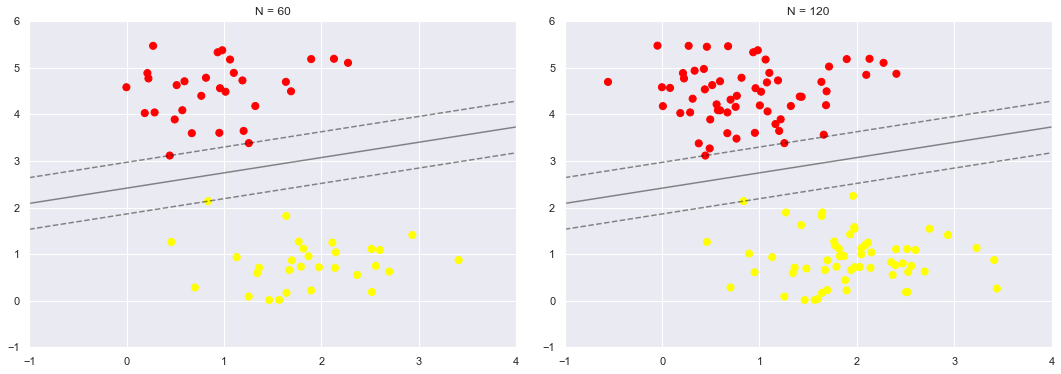

In [39]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

'''
Nous pouvons le voir, par exemple, si nous traçons le modèle appris 
des 60 premiers points et 
des 120 premiers points de cet ensemble de données:
'''

<div class="alert alert-success">
<li>Dans le panneau de gauche, nous voyons le modèle et les vecteurs de support pour 60 points d’entraînement
<li>Dans le panneau de droite, nous avons doublé le nombre de points d’entraînement, mais le modèle n’a pas changé: les trois vecteurs de support du panneau de gauche sont toujours les vecteurs de support du panneau de droite
<li>Cette insensibilité au comportement exact des points distants est l’un des points forts du modèle SVM.</div>

In [38]:
#avantage de SVM : besoin de eulement un petit nombre d'observations pour trouver les distinctions dans les classes

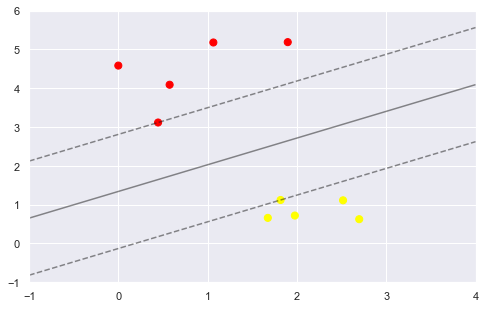

In [40]:
interact(plot_svm, N=[10, 200], ax=fixed(None));

<div class="alert alert-success">
<b><h3>SVM non linéaire: noyau</h3></b>
<br>
<li>Comment analyser les données non linéaires?
<li>SVM en combinaison avec les noyaux est plus puissant.
<li>La régression linéaire fonctionne en projetant les données dans un espace de dimension supérieure (définie par des polynômes et des fonctions gaussiennes) et permet d'ajuster les relations non linéaires avec un classifieur linéaire.
<li>SVM utilise la même approche.</div>

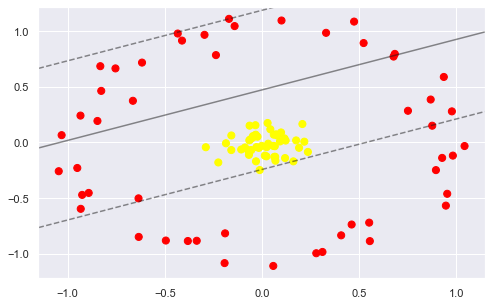

In [45]:
X, y = make_circles(100, factor=.1, noise=.1)
# on voit dans le graphique que svm est pas très bien avec ce genre de données --> il faut projeter les données 
#dans une dimension supp
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

<div class="alert alert-success">
<li>Dans l'exemple supérieur, la discrimination linéaire ne va pas aider.
<li>nous pourrions projeter les données dans une dimension supérieure en calculant une fonction de base radiale centrée sur le bloc central.
<li>Il peut être visualisé à l'aide d'un graphique en trois dimensions.</div>

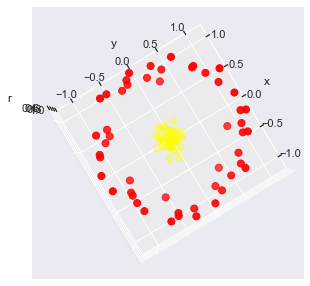

In [49]:
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

<div class="alert alert-success">
<li> maintenant la distinction entre les groupes est plus facile à voir (par exemple, r = 0,7)
<br> <br>
<li> mais il n’est pas toujours facile de trouver la solution de dimension supérieure et cela nécessite une approche informatique intense.
<br> <br>
<li> SVM a une astuce de noyau intégrée qui permet de tels calculs sans construire la représentation n-dimensionnelle complète: kernel = 'rbf' (fonction de base radiale / radial basis function)
</div>

In [42]:
# ====> À apprendre <====
#distinction dans une dimnension supp se faire avec un noyau rbf,
#qui permet de faire le calcul entre les valeurs dans d'autres dim et de faire la distinction entre les deux classes
clf = SVC(kernel='rbf', C=1E6) #clf = classifier
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

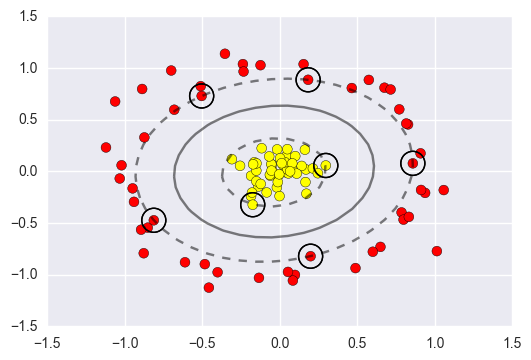

In [43]:
# ====> À apprendre <====
#transformation en des méthodes non lin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

<div class="alert alert-success">
<li>En utilisant un SVM kernelisé, nous pouvons voir une limite de décision non linéaire.
<li>La stratégie de transformation du noyau est utilisée pour transformer des méthodes linéaires en méthodes non linéaires.</div>

<div class="alert alert-success">
<li>Parfois, les données se chevauchent</div>

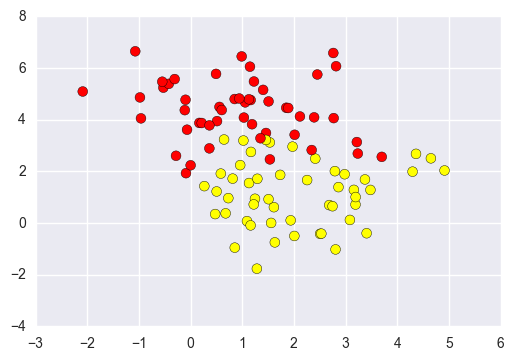

In [44]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

<div class="alert alert-success">
<li>Pour cela, SVM a un facteur qui modifie la marge, ce qui permet à certains points d'entrer dans la marge et de faire un meilleur ajustement.
<li>ce paramètre de réglage est appelé C
<li>La valeur optimale du paramètre C dépend de l'ensemble de données.
<br> <br>
<li>Le graphique suivant montre comment un C paramètre affecte l'ajustement final.</div>

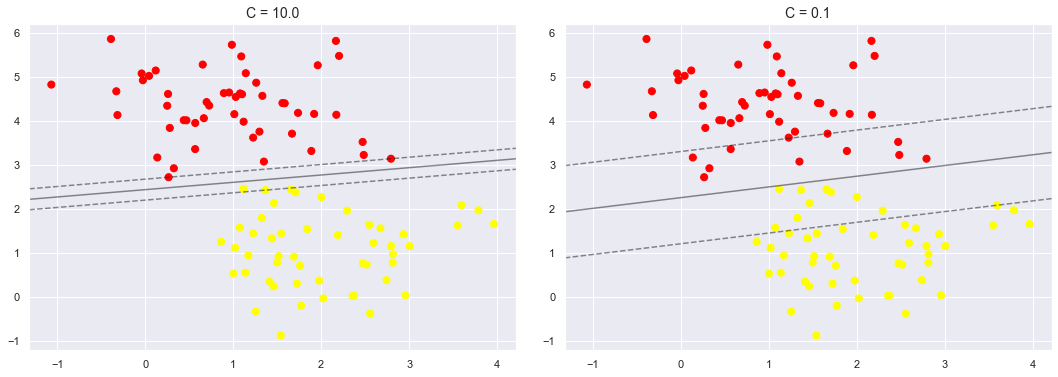

In [50]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#cette marge permet d'accepter une certaine erreur afin de recevoir un certain niveau de prédiction
#La marge est le 10, 0.1
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

<div class = "alert alert-success">
<b> <h2> Exemple: reconnaissance de visage </h2> </b>
<br>
Comme exemple de machines à vecteurs de support en action, examinons le problème de la reconnaissance faciale. Nous allons utiliser le jeu de données Labeled Faces in the Wild, qui comprend plusieurs milliers de photos assemblées de diverses personnalités publiques. Un outil de recherche pour le jeu de données est intégré à Scikit-Learn:</div>

<div class="alert alert-success">
Traçons quelques-uns de ces visages pour voir avec quoi nous travaillons:</div>

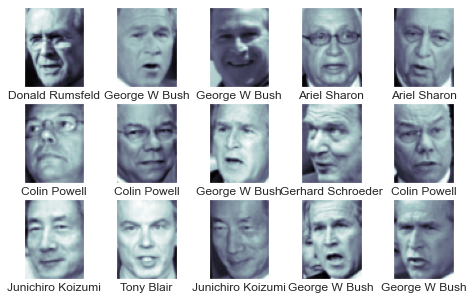

In [103]:
# ====> À apprendre <====
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition


fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

<div class="alert alert-success">
<li>Chaque image contient [62 × 47], soit près de 3 000 pixels.
<li>Nous pourrions continuer en utilisant chaque valeur de pixel en tant que caractéristique, <li>il est souvent plus efficace d'utiliser une sorte de pré-processeur pour extraire des caractéristiques plus significatives
<li>Nous utiliserons ici une analyse en composantes principales (Randomized PCA) pour extraire 150 composants fondamentaux
<li>les composent sont alimenter dans le SVM classifieur
<li>pour rester efficaces, nous pouvons utiliser un pipeline pour conditionner le préprocesseur (PCA) et le classificateur (SVM) </div>

In [67]:
# ====> À apprendre <====

#on utilise la pca pour extraire les 150 composantes les plus importantes
pca = PCA(n_components=150, whiten=True, random_state=42)
#on utilise comme au cours 8, un classificateur  svc
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

<div class="alert alert-success">les données sont divisées en un ensemble d'entraînement et de test</div>

In [68]:
# ====> À apprendre <====

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

AttributeError: 'function' object has no attribute 'data'

<div class="alert alert-success">
<li>nous pouvons utiliser une validation croisée de recherche de grille pour explorer des combinaisons de paramètres.
<li>nous ajusterons C (qui contrôle la distance de la marge)
<li>et gamma (qui contrôle la taille du noyau de la fonction de base radiale)
<li>et déterminerons le meilleur modèle</div>

In [69]:
# ====> À apprendre <====
#la valeur C recoit ces 4 valeurs
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

NameError: name 'Xtrain' is not defined

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

<div class="alert alert-success">
<li>Les valeurs optimales se situent au milieu de notre grille.
<li>si les valeurs tombaient sur les bords, nous voudrions élargir la grille pour nous assurer d’avoir trouvé le véritable optimum.
<br><br>
<li>ce modèle à validation croisée peut prédire les étiquettes des données de test</div>

In [19]:
# ====> À apprendre <====

model = grid.best_estimator_
yfit = model.predict(Xtest)

<div class="alert alert-success">
Nous pouvons voir les images de test et leurs valeurs prédites.</div>

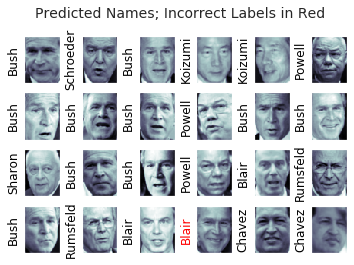

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

<div class="alert alert-success">
<li>Le rapport de classification donne une meilleure idée de la performance de l’estimateur.
<li>Il liste les statistiques de récupération étiquette par étiquette</div>

In [21]:
# ====> À apprendre <====

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



<div class="alert alert-success">
<li>une autre méthode pour visualiser les erreurs est la matrice de confusion entre les classes
<li>cela permet de voir quelles étiquettes risquent d'être confondues par l'estimateur.
</div>

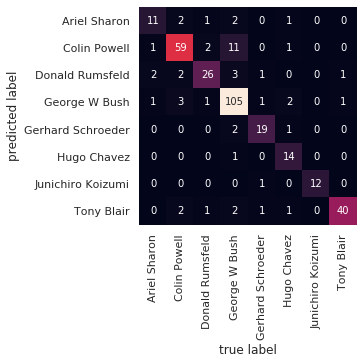

In [22]:
# ====> À apprendre <====

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<div class="alert alert-success">
<li>Dans un monde réel, les photos ne sont pas prédéfinies dans de belles grilles.
<li>la seule différence dans le système de classification faciale est la sélection des fonctionnalités
<li>un algorithme supplémentaire est nécessaire pour trouver les faces
<li>une bonne application est [OpenCV] (http://opencv.org)
</div>

<div class="alert alert-success">

<h2> SVM Résumé</h2>
<br>
<ul>
<li> SVM dépend de relativement peu de vecteurs de support, ce qui permet des modèles compacts et très peu de mémoire.
<li> Une fois le modèle formé, la phase de prédiction est très rapide.
<li> Comme ils ne sont affectés que par des points proches de la marge, ils fonctionnent bien avec les données de grande dimension, même les données avec plus de dimensions que les échantillons (un régime difficile pour les autres algorithmes).
<li> L'intégration avec les méthodes du noyau permet de s'adapter à de nombreux types de données.</ul>
<br>
SVM présentent plusieurs inconvénients:
<br><ul>
<li> Les résultats dépendent fortement d'un choix approprié pour le paramètre d'assouplissement $ C $. Cela doit être soigneusement choisi via une validation croisée, ce qui peut coûter cher à mesure que la taille des jeux de données augmente.
<li> Les résultats n’ont pas d’interprétation probabiliste directe. Ceci peut être estimé via une validation croisée interne mais cette estimation supplémentaire est coûteuse.
<li> Pour un grand nombre d'échantillons d'apprentissage, le coût de la mise à l'échelle peut être prohibitif.</ul>
<br>
<li>Ainsi, la SVM est considérée après que d'autres méthodes plus simples, plus rapides et moins intensives se soient avérées insuffisantes.
<li>Mais si les cycles du processeur ne posent pas de problème pour l’entraînement et la validation croisée, le SVM peut donner d’excellents résultats.
</div>

<div class="alert alert-info">
<b><h1>KNN</h1></b></div>

<div class="alert alert-success">
<b><h3>qu'est-ce que KNN ?</h3></b>
<br>
<li>L'algorithme KNN est un classificateur robuste et polyvalent qui est souvent utilisé comme référence pour des classificateurs plus complexes tels que les réseaux de neurones artificiels (ANN) et les machines à vecteurs de support (SVM)
<li>il est simple mais il peut surperformer les classificateurs plus puissants
<li>est utilisé dans la prévision économique, la compression de données, la génétique et autres
<li>KNN est un apprentissage supervisé et fonctionne avec des jeux de données étiquetés comprenant des observations d'apprentissage (x, y) et est utilisé pour capturer la relation entre x et y (x = entité, prédicteur, attribut; y = cible, libellé, classe)
<li>La description formelle de l’objectif consiste à apprendre une fonction h: X -> Y afin qu’avoir une observation invisible x, h(x) puisse prédire avec confiance le résultat y correspondant.
<li>KNN est non paramétrique; il n'émet pas d'hypothèses explicites sur la forme fonctionnelle de h, ce qui évite les erreurs de modélisation de la distribution sous-jacente des données (par exemple, si les données sont hautement non gaussiennes mais le modèle d'apprentissage choisi prend une forme gaussienne, l'algorithme produira des prédictions extrêmement mauvaises)
<li>KNN est un algorithme d'apprentissage basé sur une instance; ce qui signifie que l'algorithme n'apprend pas explicitement un modèle, mais choisit de mémoriser les instances de formation qui sont ensuite utilisées comme «connaissances» pour la phase de prédiction [par exemple, uniquement lorsqu'une interrogation de notre base de données est effectuée (lorsque l'étiquette est faite), l'algorithme utilisera les instances de formation pour donner une réponse]
<li>KNN a un coût de mémoire et de calcul élevé pendant la période de test.
</div>

<div class="alert alert-success">
<b><h3>Comment fonctionne KNN</h3></b>
<br>
<li>Explication 1 (générale):<ul>
<li>L'algorithme KNN forme un vote à la majorité entre les K instances les plus similaires à une observation «invisible» donnée.
<li>La similarité est définie selon une métrique de distance entre deux points de données (choix courants: distance euclidienne, Manhattan, Chebyshev, Hamming).</ul>
</div>

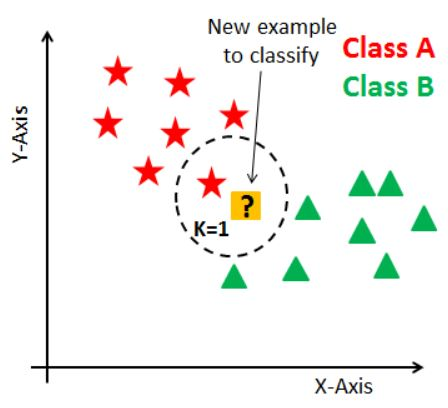

In [16]:
Image("knn_explanation.jpg")

<div class="alert alert-success">
<b><h3>Comment fonctionne KNN</h3></b>
<br>
<li>Explication 2 (par étape):<ol>
<li>KNN lit la nouvelle instance
<li>KNN recherche dans les observations d’entraînement mémorisées 
<li>recherche les K instances qui se rapprochent le plus de la nouvelle instance
<li>KNN attribue a la nouvelle instance la classe la plus courante.</ol>
<br>
<li>Explication 3 (mathématique):<ul>
<li>nous avons un entier positif K
<li>+ une observation invisible x
<li>+ une métrique de similarité d
<br><br>
<li>KNN effectue 3 étapes:<ol>
<li>parcourt tout le jeu de données en calculant d entre x et chaque observation d'apprentissage (K points les plus proches de x = A). K est généralement impair, pour éviter les situations d'égalité.
<li>KNN estime la probabilité conditionnelle pour chaque classe. La probabilité conditionnelle est la fraction de points dans A avec cette étiquette de classe donnée.
<li>l'entrée x est assignée à la classe avec la plus grande probabilité.</ol></ul>



</div>

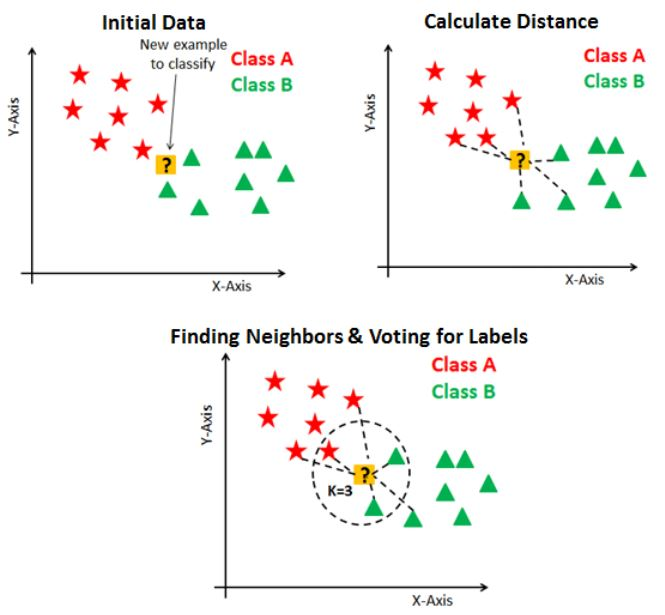

In [17]:
Image("knn_explanation2.jpg")

<div class="alert alert-success">
<li>Le K est défini par l'utilisateur.
<li>Lorsque K est petit, il restreint la région d'une prédiction donnée et oblige le classifieur à être «plus aveugle» à la distribution globale.
<li>Une petite valeur pour K fournit l'ajustement le plus flexible, avec un biais faible mais une variance élevée.
<li>un K supérieur représente en moyenne plus d’électeurs dans chaque prévision et est plus résistant aux valeurs aberrantes.
<li>Les valeurs plus grandes de K auront des limites de décision plus lisses, ce qui signifie une variance plus faible mais un biais accru.</div>

[source](http://scott.fortmann-roe.com/docs/BiasVariance.html)

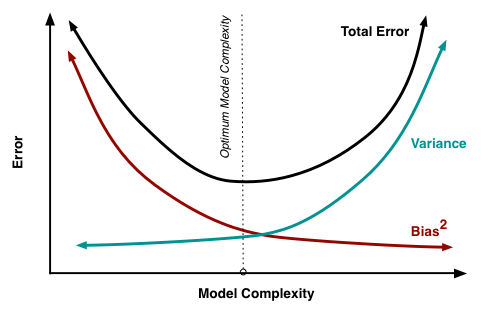

In [4]:
Image("biasvariance_graph.png")

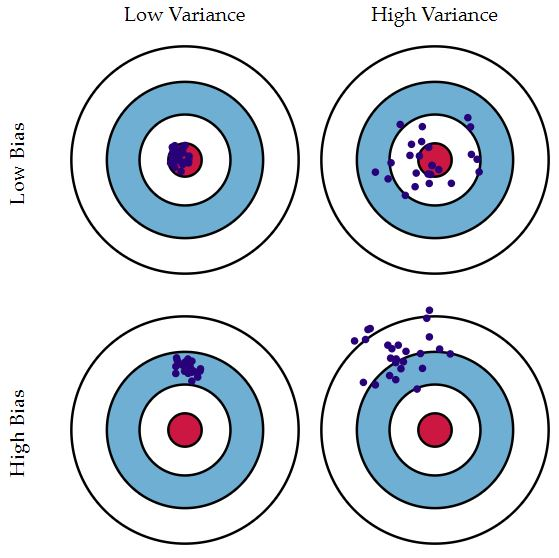

In [25]:
Image("bias_variance_high_low.JPG") 

<div class = "alert alert-success">
<b> <h2> Exemple KNN: base de données iris </h2> </b>
<br>
</div>

In [70]:
# ====> À apprendre <====

# create design matrix X and target vector y
X = np.array(iris.iloc[:, 0:4]) 	# end index is exclusive
y = np.array(iris['species']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
# ====> À apprendre <====

# instantiate learning model (k = 3)
model = KNN(n_neighbors=3)

# fitting the model
model.fit(X_train, y_train)

# predict the response
pred = model.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.98


<div class = "alert alert-success">
<b> <h2> Exemple KNN: jeu de données créé </h2> </b>
</div>

In [72]:
# Assigning features and label variables
# First Feature
weather=['Ensoleillée','Ensoleillée','Couverte','Pluvieuse','Pluvieuse','Pluvieuse','Couverte','Ensoleillée','Ensoleillée',
'Pluvieuse','Ensoleillée','Overcast','Couverte','Pluvieuse']
# Second Feature
temp=['Chaude','Chaude','Chaude','douce','Cool','fraîche','fraîche','douce','fraîche','douce','douce','douce','Chaude','douce']

# Label or target varible
jouer=['Non','Non','Oui','Oui','Oui','Non','Oui','Non','Oui','Oui','Oui','Oui','Oui','Non']

<div class = "alert alert-success">
<li>L'algorithme KNNearn nécessite des données d'entrée numériques. Nous devons donc représenter les colonnes catégoriques dans une colonne numérique.

<li>pour encoder ces données, mappons chaque valeur à un nombre. par exemple. Nuageux: 0, Pluvieux: 1 et Ensoleillé: 2.

<li>Ce processus est connu sous le nom de codage d'étiquette, et sklearn le fera facilement pour vous en utilisant Label Encoder.</div>

In [73]:
# ====> À apprendre <====

#creating labelEncoder
le = LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(jouer)

print(weather_encoded)

[1 1 0 3 3 3 0 1 1 3 1 2 0 3]


<div class = "alert alert-success">
<li>combinons maintenant plusieurs colonnes ou fonctionnalités en un seul ensemble de données à l'aide de la fonction "zip"</div>

In [74]:
# ====> À apprendre <====

#combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

<div class = "alert alert-success">
<li>créons l'objet de classificateur KNN en passant l'argument numéro de voisins dans la fonction KNeighborsClassifier() (imported as KNN).

<li>Ensuite, ajustez le modèle sur le train à l'aide de fit() et effectuez une prédiction sur le jeu de tests à l'aide de predict()</div>

In [75]:
# ====> À apprendre <====

model = KNN(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)
#donc on va voir dans la ls de prédiction à la position 2 --> prédiction = non

[1]


<div class = "alert alert-success">
<li>résultat: lorsque l'entrée est [0,2], où 0 signifie temps couvert et 2 signifie température douce - le modèle prédit [1], ce qui signifie jouer.</div>

<div class="alert alert-success">

<h3>Avantages KNN</h3>
<br>
<li>est simple à comprendre
<li>est facile à mettre en œuvre
<li>zéro à peu de temps d'entraînement
<li>outil utile pour l'analyse immédiate de certains ensembles de données
fonctionne facilement avec des ensembles de données multiclasses alors que d'autres algorithmes sont codés en dur pour le réglage binaire
<li>La nature non paramétrique de KNN lui confère un avantage dans certains contextes où les données peuvent être très «inhabituelles».
<br>
<h3>Inconvénients KNN</h3>
<br>
<li>a une phase de test coûteuse en informatique - peu pratique dans un contexte industriel.
<li>Il existe une dichotomie rigide entre KNN et le réseau de neurones plus sophistiqué, qui comporte une longue phase d’entraînement bien que très rapide.
<li>KNN peut souffrir de distributions de classes asymétriques (si une classe est très fréquente dans l’entraînement, elle aura tendance à dominer le vote à la majorité du nouvel exemple (grand nombre = plus commun)).
<li>La précision de KNN peut être gravement dégradée avec des données de grande dimension car il y a peu de différence entre le voisin le plus proche et le plus éloigné.
<br>
<b><h3>Améliorations pour KNN</h3></b>
<br>
<li> Il est possible de remédier aux distributions asymétriques des classes en appliquant un vote pondéré. La classe de chacun des K voisins est multipliée par un poids proportionnel à l'inverse de la distance entre ce point et le point de test donné. Cela garantit que les voisins les plus proches contribuent plus au vote final que les plus éloignés.
<li> Changer la métrique de distance pour différentes applications peut aider à améliorer la précision de l'algorithme (c'est-à-dire la distance de Hamming pour la classification du texte).
<li> Le rééchelonnage de vos données donne plus de sens à la métrique de distance (étant donné que 2 caractéristiques sont la hauteur et le poids, une observation telle que x = [180,70] inclinera clairement la métrique de distance en faveur de la hauteur; une façon de la corriger consiste à soustraire les colonnes. la moyenne et la division par l'écart type - méthode normalize() de Scikit-learn)
<li>Les techniques de réduction de la dimensionnalité telles que la PCA doivent être exécutées avant d’appliquer KNN et contribuer à rendre la mesure de distance plus significative.
<li>Des techniques approximatives du plus proche voisin, telles que l’utilisation d’arbres k-d pour stocker les observations d’entraînement, peuvent être utilisées pour réduire le temps de test (attention - ces méthodes ont tendance à être médiocres dans les grandes dimensions (20+) et il est préférable d’utiliser un hachage sensible à la localisation (LHS)).</div>

<div class="alert alert-info">
<b><h1>Arbres de Décision et Forêts Aléatoires</h1></b></div>

<div class="alert alert-success">
<h1>Arbres de Décision</h1>
<br>
Les arbres de décision constituent un moyen extrêmement intuitif de classer ou d’étiqueter des objets en:
<li>posant une série de questions;
<li>les questions sont conçues pour se concentrer sur la classification
<br><br>
exemple de construction d'un arbre de décision pour classer un animal:</div>

(0.0, 1.0, 0.0, 1.0)

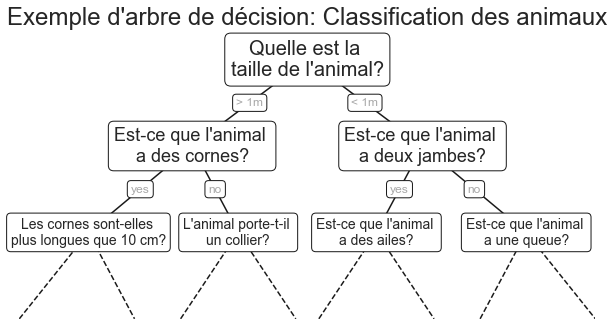

In [92]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Exemple d\'arbre de décision: Classification des animaux', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "Quelle est la \ntaille de l'animal?", 20)
text(ax, 0.3, 0.6, "Est-ce que l'animal \na des cornes?", 18)
text(ax, 0.7, 0.6, "Est-ce que l'animal \na deux jambes?", 18)
text(ax, 0.12, 0.3, "Les cornes sont-elles \nplus longues que 10 cm?", 14)
text(ax, 0.38, 0.3, "L'animal porte-t-il \nun collier?", 14)
text(ax, 0.62, 0.3, "Est-ce que l'animal \na des ailes?", 14)
text(ax, 0.88, 0.3, "Est-ce que l'animal \na une queue?", 14)

text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

<div class="alert alert-success">
<li>La division binaire rend cela extrêmement efficace
<li>dans un arbre bien construit:<ol>
    <li>chaque question réduit le nombre d'options de moitié environ
    <li>réduire très rapidement les options, même parmi un grand nombre de classes
    </ol>
<li>Le défi consiste à décider quelles questions poser à chaque étape.
<li>Dans les implémentations d'apprentissage automatique des arbres de décision, les questions prennent généralement la forme de divisions des données alignées sur les axes: chaque noeud de l'arborescence divise les données en deux groupes en utilisant une valeur seuil dans l'une des fonctions.
</div>

<div class="alert alert-success">
Voici un exemple de données 2D avec l’une des quatre étiquettes de classe suivantes:</div>

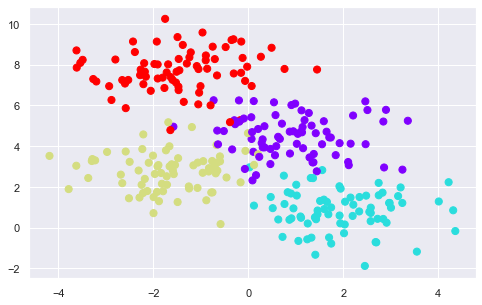

In [93]:
# ====> À apprendre <====

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

<div class="alert alert-success">
<li>Un simple arbre de décision construit à partir de ces données divise les données de manière itérative le long de l'un ou l'autre des axes en fonction d'un critère quantitatif.
<li>à chaque niveau, il attribue l'étiquette de la nouvelle région en fonction d'un vote à la majorité des points qu'il contient.
<li>Regardons les quatre premiers niveaux d'un classifieur d'arbre de décision pour ces données:
</div>

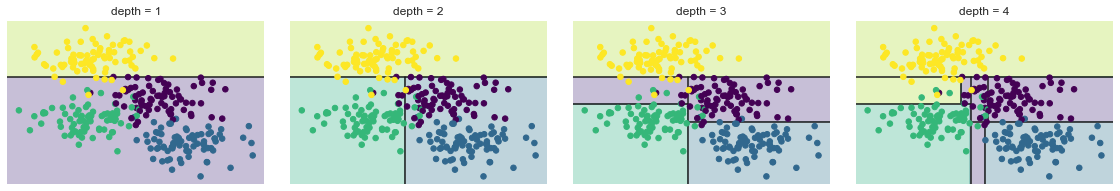

In [94]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    plotting_help.visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

<div class="alert alert-success">
<li>Notez qu'après la première division, chaque point de la branche supérieure reste inchangé.
<li>Il n'est donc pas nécessaire de subdiviser davantage cette branche.
<li>À l'exception des nœuds contenant une seule couleur, à chaque niveau chaque région est à nouveau divisée le long de l'une des deux caractéristiques.
<br><br>
<li>Ce processus d'adaptation d'un arbre de décision aux données peut être effectué dans Scikit-Learn avec l'estimateur <i>DecisionTreeClassifier</i>
</div>

<div class="alert alert-success">
voici comment se présente la classification de l'arbre de décision:
</div>

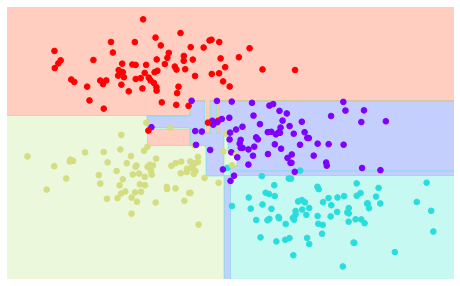

In [79]:
plotting_help.visualize_classifier(DecisionTreeClassifier(), X, y)

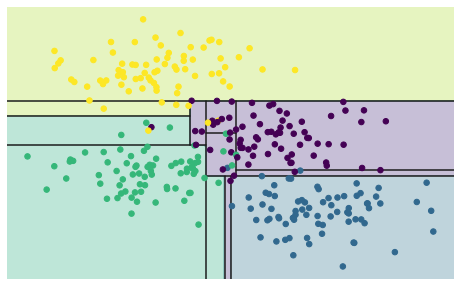

In [80]:
plotting_help.plot_tree_interactive(X, y);

<div class="alert alert-success">
<li>Notez que lorsque la profondeur augmente, nous avons tendance à avoir des régions de classification de forme très étrange.
<li>par exemple, à une profondeur de cinq, il y a une grande région pourpre maigre entre les régions jaune et bleue.
<br><br>?????
<li>S'agit-il d'un résultat de la distribution des données ou d'un résultat des propriétés d'échantillonnage ou de bruit particulières des données?
<br><br>
<li>S'il s'agit de bruit, cela signifie que l'arbre de décision, même à cinq niveaux de profondeur, sur-ajuste les données.
</div>

<div class="alert alert-success">
<li>le sur-ajustement est une propriété générale des arbres de décision
<li>il est très facile d'aller trop loin dans l'arbre et d'ajuster ainsi les détails des données particulières plutôt que les propriétés globales des distributions à partir desquelles ils sont extraits.

<li>Une autre façon de voir ce sur-ajustement consiste à examiner des modèles formés sur différents sous-ensembles de données.

<li>Voici un exemple où nous entraînons deux arbres différents, chacun sur la moitié des données d'origine:
</div>

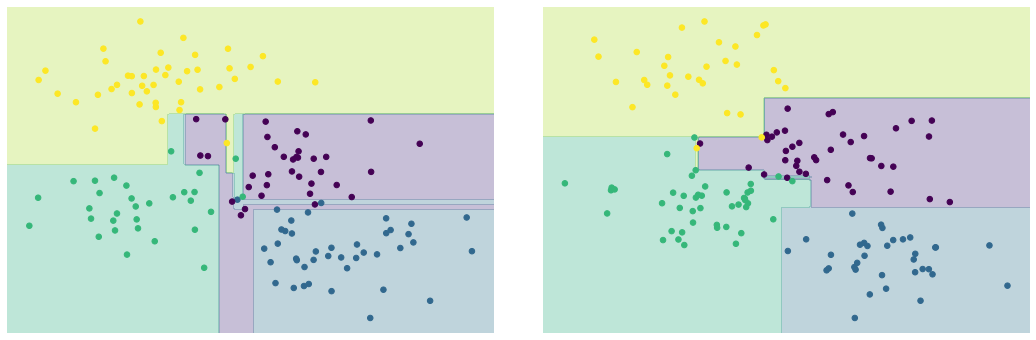

In [81]:
model = DecisionTreeClassifier()
#on peut entrainer deux arbres diff. sur des sous-ensemble de donneés diff. pour voir si on fait du overfitting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
plotting_help.visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
plotting_help.visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])
#théoriquement chaque arbre est définit avec un certain seuil définit par nous subjectivement
#en lefaisant plusieurs fois, on peut trecevoir plusieurs valeurs de précision et le résultat final va ŵtre la moyenne de toutes 
# ces valeurs

<div class="alert alert-success">
<li>Il est clair que dans certains endroits, les deux arbres produisent des résultats cohérents (par exemple, aux quatre coins).
<li>tandis que dans d'autres endroits, les deux arbres donnent des classifications très différentes (par exemple, dans les régions situées entre deux groupes).
<li>L'observation clé est que les incohérences ont tendance à se produire lorsque la classification est moins certaine et qu'en utilisant les informations de ces deux arbres, nous pourrions obtenir un meilleur résultat!
</div>

<div class="alert alert-success">
ci-dessous une fonction qui permet d’afficher de manière interactive les ajustements d’arbres dressés sur un sous-ensemble aléatoire de données
</div>

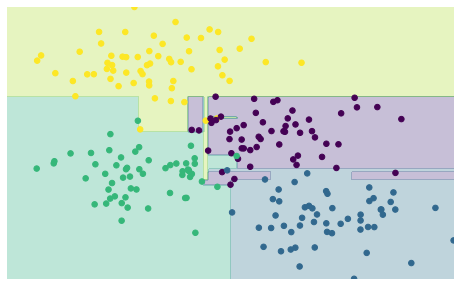

In [82]:
plotting_help.randomized_tree_interactive(X, y)

<div class="alert alert-success">
Puisque les informations provenant de deux arbres améliorent les résultats, nous pouvons nous attendre à ce que les informations provenant de nombreux arbres améliorent encore davantage nos résultats.
</div>

<div class="alert alert-success">
<h1>Forêts Aléatoires</h1>
<br>
<li>Les forêts aléatoires constituent un puissant algorithme non paramétrique.
<li>Les forêts aléatoires sont un ensemble d'apprentissage construit sur des arbres de décision.
<li>sont une méthode d'ensemble (elle repose sur l'agrégation des résultats d'un ensemble d'estimateurs simples)
<li>la méthode de l'ensemble peut aboutir au fait que la somme (un vote à la majorité entre plusieurs estimateurs) peut être supérieure et meilleure que les parties (n'importe lequel des estimateurs individuels effectuant le vote)
</div>

<div class="alert alert-success">
<h3>Forêts Aléatoires - Classification</h3>
<br>
<li>Les forêts aléatoires sont basées sur la notion que plusieurs estimateurs de surajustement peuvent être combinés pour réduire l'effet de surajustement.
<li>Pour cela, une méthode supplémentaire appelée * baggin / la mise en sac * est utilisée.
<li>La mise en sac : <ol>
    <li>utilise un ensemble (une poche, peut-être) d'estimateurs parallèles
    <li>chacun d'entre eux se superposant aux données
    <li>la moyenne des résultats peut trouver une meilleure classification.</ol>
<li>Un ensemble d'arbres de décision <b>randomisés</b> est appelé forêt aléatoire

<li>Ce type de classification d'ensachage peut être effectué manuellement à l'aide du méta-estimateur ``BaggingClassifier`` de Scikit-Learn</div>

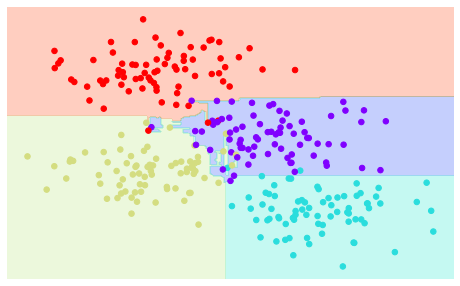

In [83]:
tree = DecisionTreeClassifier()
#on prend 100 estimations, et 80% de l'échantillon à la fois
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
plotting_help.visualize_classifier(bag, X, y)

<div class="alert alert-success">
<li>Dans cet exemple, nous avons randomisé les données en ajustant chaque estimateur avec un sous-ensemble aléatoire de 80% des points d'apprentissage.
<li>En pratique, les arbres de décision sont plus efficacement randomisés en injectant une certaine stochasticité dans la manière dont les divisions sont choisies: ainsi, toutes les données contribuent à l'ajustement à chaque fois, mais les résultats de l'ajustement ont toujours le caractère aléatoire souhaité.
<li>Par exemple, lors de la détermination de la fonctionnalité à scinder, l’arborescence randomisée peut choisir parmi les nombreuses fonctionnalités les plus importantes.
<li>(Plus d'informations ici: http://scikit-learn.org/stable/modules/ensemble.html#forest)
<br><br>
<li>Dans Scikit-Learn, un tel ensemble optimisé d'arbres de décision randomisés est implémenté dans l'estimateur <i>RandomForestClassifier</i>, qui gère automatiquement toute la randomisation.
<li>Tout ce qu’il faut faire, c’est choisir un certain nombre d’estimateurs, qui seront (en parallèle, si on le souhaite) adaptés à l’ensemble des arbres.
</div>

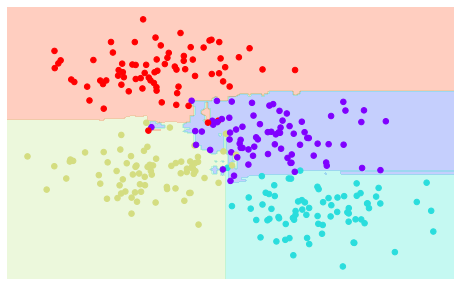

In [84]:
# ====> À apprendre <====

model = RandomForestClassifier(n_estimators=100, random_state=0)
plotting_help.visualize_classifier(model, X, y);

<div class="alert alert-success">
En faisant la moyenne de plus de 100 modèles perturbés de manière aléatoire, nous obtenons un modèle global qui semble beaucoup plus proche des résultats intuitifs.
</div>

<div class="alert alert-success">
<h3>Forêts Aléatoires - Régression</h3>
<br>
<li>Les forêts aléatoires fonctionnent également en cas de régression (variables continues)
<li>L’estimateur à utiliser pour cela est le <i>RandomForestRegressor</i>
<li>la syntaxe est similaire à la méthode de classification.
<br><br>
<li>Les données suivantes sont tirées de la combinaison d'une oscillation rapide et lente:
</div>

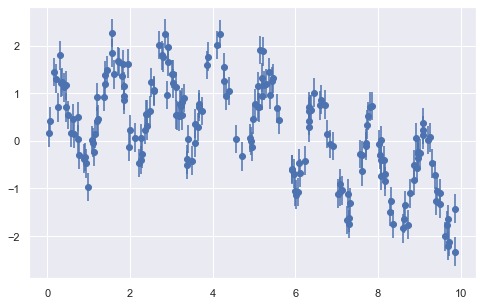

In [85]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

<div class="alert alert-success">
En utilisant le régresseur de forêt aléatoire, nous pouvons trouver la meilleure courbe d’ajustement comme suit:
</div>

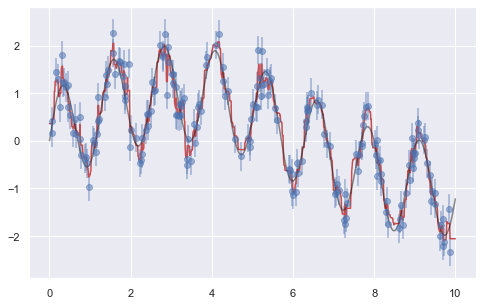

In [86]:
# ====> À apprendre <====

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

<div class="alert alert-success">
<li>le vrai modèle est montré dans la courbe grise lisse.
<li>le modèle de forêt aléatoire est représenté par la courbe rouge irrégulière.
<li>On peut constater que le modèle de forêt aléatoire non paramétrique est suffisamment flexible pour s'adapter aux données multi-périodes, sans qu'il soit nécessaire de spécifier un modèle multi-période.
</div>

<div class="alert alert-success">
<b>Exemple: forêt aléatoire pour la classification des chiffres</b>
<br>
Voyons comment le classifieur de forêt aléatoire peut être utilisé pour classifier les chiffres.
</div>

In [95]:
# ====> À apprendre <====

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<div class="alert alert-success">
Pour nous rappeler ce que nous examinons, nous allons visualiser les premiers points de données:
</div>

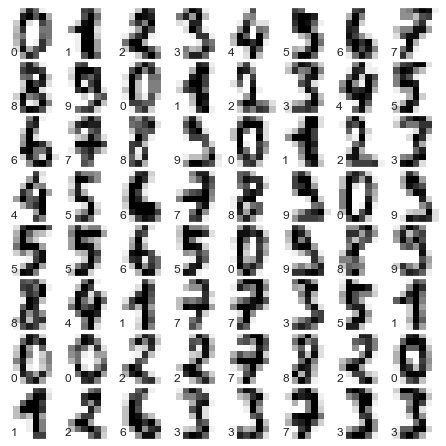

In [96]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

<div class="alert alert-success">
Nous pouvons rapidement classer les chiffres à l'aide d'une forêt aléatoire comme suit:
</div>

In [100]:
# ====> À apprendre <====

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

<div class="alert alert-success">
Nous pouvons consulter le rapport de classification de ce classificateur:
</div>

In [98]:
# ====> À apprendre <====

print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<div class="alert alert-success">
Et pour faire bonne mesure, tracez la matrice de confusion:
</div>

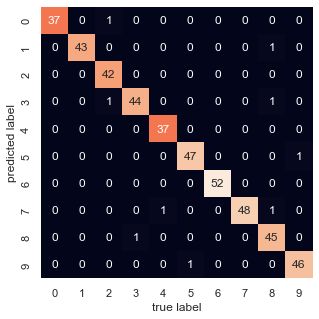

In [99]:
# ====> À apprendre <====

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<div class="alert alert-success">
Nous trouvons qu'une forêt aléatoire simple et non syntonisée donne lieu à une classification très précise des données numériques.
</div>

<div class="alert alert-success">
<h2> Arbres de Décision et Forêts Aléatoires Résumé</h2>
<h3>Avantages Forêts Aléatoires</h3>
<br>
<li>La formation et la prévision sont très rapides, en raison de la simplicité des arbres de décision sous-jacents.
<li>les deux tâches peuvent être directement parallélisées, car les arbres individuels sont des entités entièrement indépendantes.
<li>Les arborescences multiples permettent une classification probabiliste: un vote à la majorité entre estimateurs donne une estimation de la probabilité (DecisionTreeClassifier.predict_proba() )
<li>Le modèle non paramétrique est extrêmement flexible et peut donc bien exécuter des tâches sous-ajustées par d'autres estimateurs.
<br>
<h3>Inconvénients Forêts Aléatoires</h3>
<br>
<li>les résultats ne sont pas facilement interprétables;
<li>ils sont pas le meilleur choix pour tirer des conclusions sur la signification du modèle de classification.</div>